In [1]:
import numpy as np
from lib.photo import IMAGE
import os
from PIL import Image

In [2]:
def list_files(directory_path):
    # Use the os.walk() function to iterate over each directory in the file system hierarchy
    file_list = []
    for root, dirs, files in os.walk(directory_path):
        # For each directory, iterate over each file
        for file in files:
            file_list.append(os.path.join(root, file))
    return file_list
start_path = "./data/faces"
file_list = list_files(start_path)
img_list = []
for file_path in file_list:
    img = IMAGE(file_path)
    img_list.append(img)

In [3]:
for iter in range(len(img_list)):
    img_list[iter].array = img_list[iter].array / 255
    mean_val = np.mean(img_list[iter].array)
    std_val = np.std(img_list[iter].array)
    img_list[iter].array = (img_list[iter].array - mean_val) / std_val

In [10]:
# select images
cleaned_imglist = []
count = 0
for iter in range(len(img_list)):
    if img_list[iter].imgsize[0] < 60:
        cleaned_imglist.append(img_list[iter])
        count += 1
print(f"For cleaned images: the total number of my training data is {count} in {len(img_list)}")

For cleaned images: the total number of my training data is 624 in 1888


In [11]:
from scipy import ndimage
for iter in range(len(cleaned_imglist)):
    if cleaned_imglist[iter].imgsize[0] == 30:
        cleaned_imglist[iter].array = ndimage.zoom(cleaned_imglist[iter].array, (2, 2), order=1)
        # update the size
        cleaned_imglist[iter].imgsize = np.shape(cleaned_imglist[iter].array)
    cleaned_imglist[iter].squarize()

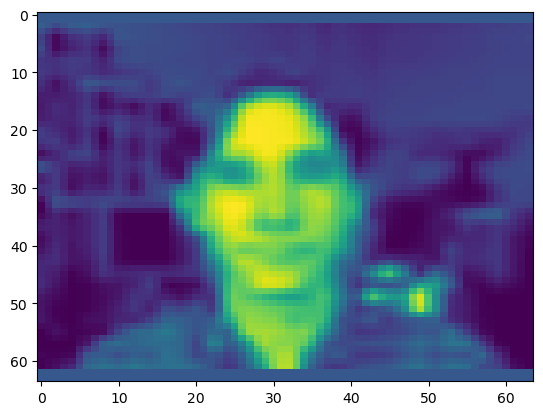

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(cleaned_imglist[0].array, aspect='auto')
plt.show()

In [14]:
print(cleaned_imglist[0].array.shape)

(64, 64)
